In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("housing.csv")  

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (20640, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

First 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                2

In [13]:
# Data Cleaning
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")


In [14]:
# 3. Exploratory Analysis
print("\nStatistical Summary:")
print(df.describe())



Statistical Summary:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900  

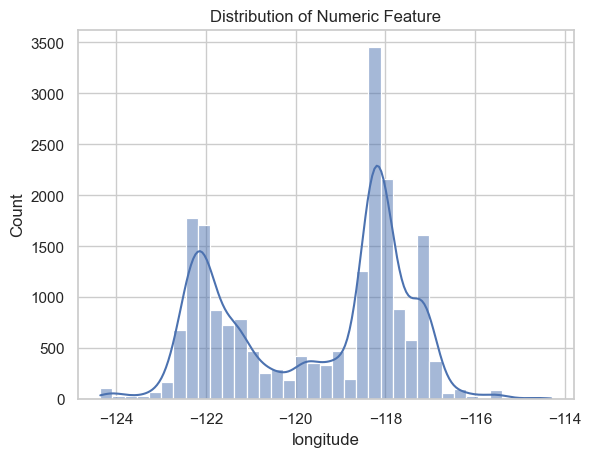

In [15]:
# Visualizations
sns.set(style="whitegrid")

# 1. Distribution of a numeric column
plt.figure()
sns.histplot(df.select_dtypes(include='number').iloc[:, 0], kde=True)
plt.title("Distribution of Numeric Feature")
plt.show()

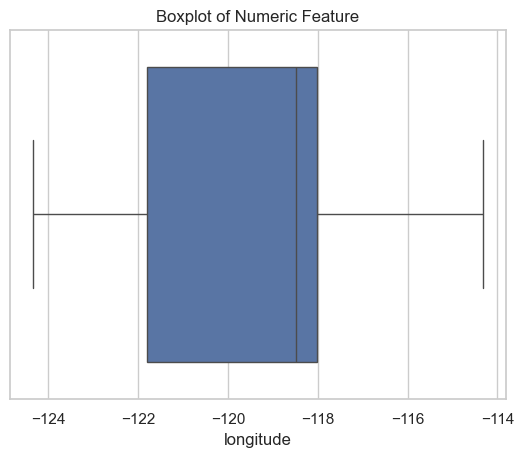

In [16]:

# 2. Boxplot (outliers)
plt.figure()
sns.boxplot(x=df.select_dtypes(include='number').iloc[:, 0])
plt.title("Boxplot of Numeric Feature")
plt.show()

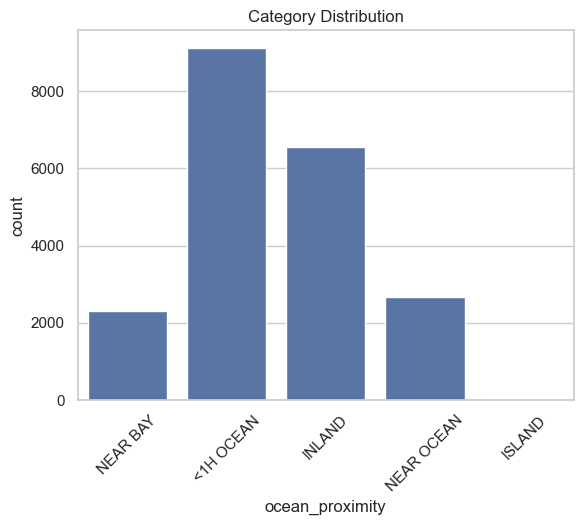

In [17]:

# 3. Count plot for a categorical column
plt.figure()
sns.countplot(x=df.select_dtypes(include='object').iloc[:, 0])
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()


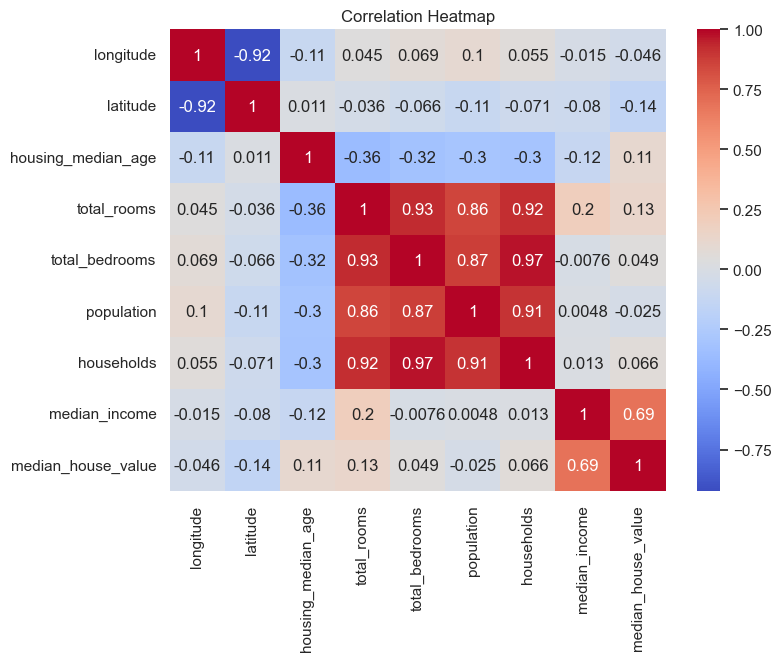

In [18]:

# 4. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


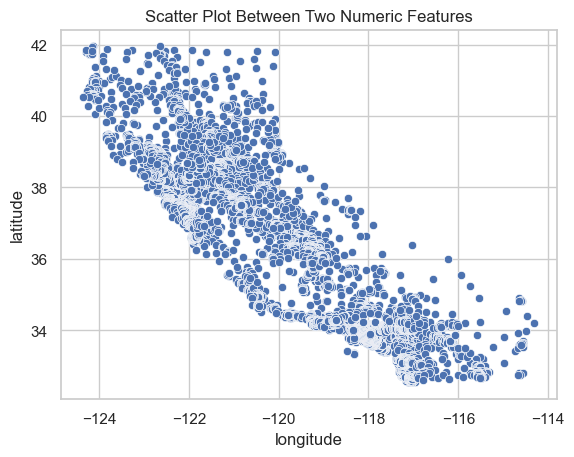

In [19]:

# 5. Scatter plot between two numeric variables
numeric_cols = df.select_dtypes(include='number').columns
if len(numeric_cols) >= 2:
    plt.figure()
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
    plt.title("Scatter Plot Between Two Numeric Features")
    plt.show()


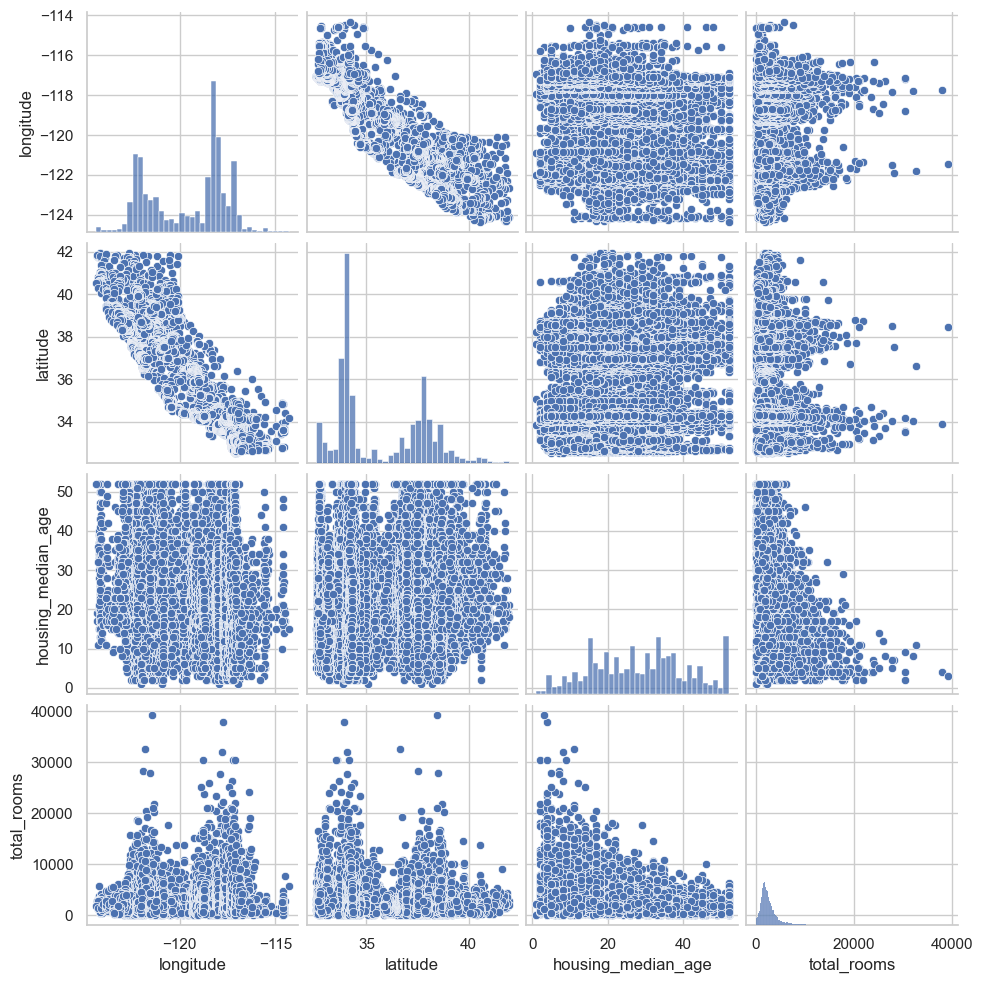

In [20]:

# 6. Pairplot
sns.pairplot(df[numeric_cols[:4]])
plt.show()


In [21]:
# Save cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as cleaned_dataset.csv")


Cleaned dataset saved as cleaned_dataset.csv
